<a href="https://colab.research.google.com/github/ArvindRajen/Cancer_Analysis/blob/main/prostate_cancer_predictions_with_ml_and_dl_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**

I'll train Prostate Cancer data with some machine learning and deep learning methods. 

* EDA (Exploratory Data Analysis)
* Data Preprocessing (Scaling, Reshaping)
* Test-Train Dataset Split
* Logistic Regression Classification
* KNN Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Desicion Tree Classification
* Random Forest Classification
* Artificial Neural Network
* Recurrent Neural Network
* Compare all of these Classification Models
* Conclusion

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
Cancer = pd.read_csv("/content/Prostate_Cancer.csv")

In [3]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
Cancer.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [5]:
Cancer.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [6]:
Cancer.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [7]:
Cancer.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [12]:
Cancer.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False])

In [13]:
Cancer.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False])

In [14]:
# ID of the patients is unneccessary. So, we drop that!
Cancer.drop(labels = ['id'],axis=1, inplace=True)
Cancer.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Cancer['diagnosis_result'] = le.fit_transform(Cancer.diagnosis_result)
# Malignant Tumors 'M' are encoded as 1 and Beneign Tumors are encoded as 0
Cancer.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

In [18]:
x = Cancer.iloc[:,1:8]
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry
0,23,12,151,954,0.143,0.278,0.242
1,9,13,133,1326,0.143,0.079,0.181
2,21,27,130,1203,0.125,0.160,0.207
3,14,16,78,386,0.070,0.284,0.260
4,9,19,135,1297,0.141,0.133,0.181


In [ ]:
# See the Targets
y = Cancer.iloc[:, 0]
y.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

In [ ]:
# Normalization: Normalization means all of the values of data, scale between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [ ]:
# We are ready to split data into training and testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
#%25 of data will assign as 'Test Data'
method_names=[] # In Conclusion part, I'll display the method that gave the best result.
method_scores=[]

In [ ]:
# Let's look at new values.
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(75, 7)
(25, 7)
(75,)
(25,)


**And now time to classification!**


Logistic Regression Classification Test Accuracy 0.8


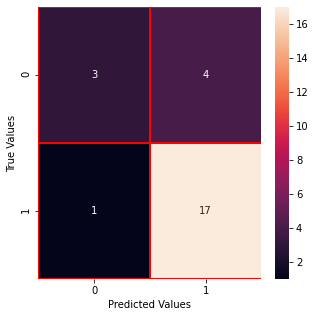

In [ ]:
# Firstly, we start with Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 5: 0.8


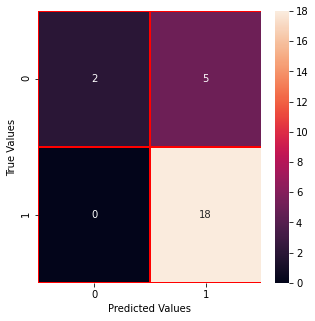

In [ ]:
# Continue with; KNN Classification!
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # 5 is optional.
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 5: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.84


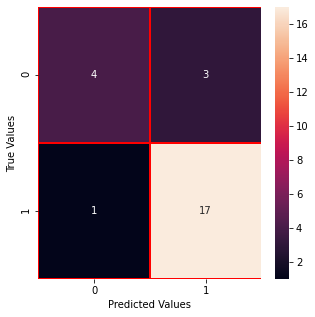

In [ ]:
# SVM!
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 0.8


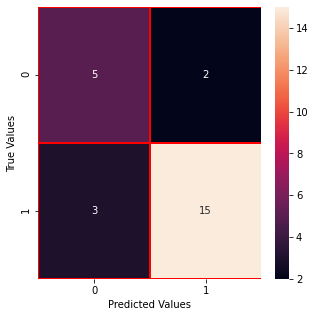

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  0.72


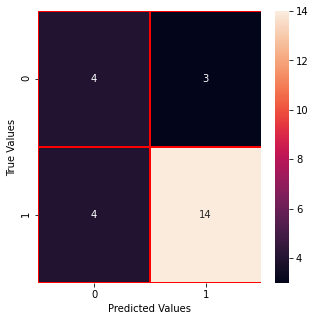

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Classification Score:  0.8


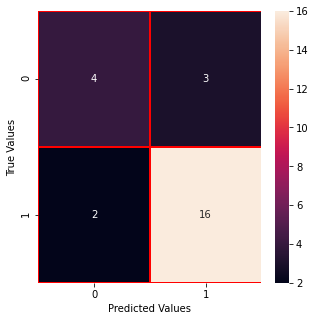

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
# ANN!
%%time
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5800
Epoch 3/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5200
Epoch 4/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5200
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5200
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5200
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5200
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5200
Epoch 9/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5200
Epoch 10/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5200
Epoch 11/200
2/2 [===========

In [ ]:
method_names.append("ANN")
method_scores.append(0.853))

In [ ]:
trainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
testX = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# Print and check shapes
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

Shape of trainX is (75, 7, 1)
Shape of testX is (25, 7, 1)


In [ ]:
from keras.layers import Dense, SimpleRNN, Dropout
from keras.metrics import mean_squared_error
from keras.models import Sequential
model = Sequential()
# Add the first layer and Dropout regularization
model.add(SimpleRNN(units=100,activation='tanh',return_sequences=True, 
                    input_shape=(trainX.shape[1],1)))
model.add(Dropout(0.20))
# Second layer and Dropout regularization
model.add(SimpleRNN(units = 100, activation='tanh',return_sequences=True))
model.add(Dropout(0.20))
# Third layer and Dropout regularization
model.add(SimpleRNN(units = 70, activation='tanh', return_sequences= True))
model.add(Dropout(0.20))
# Fourth layer and Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.20))
# Add final or output layer
model.add(Dense(units=1))

# Compile our RNN model
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])
# Fitting the RNN to the training set
model.fit(trainX, y_train, epochs = 200, batch_size=32)
# Remember; epochs, batch_size etc. are just some of hyper parameters. 
# You can change these parameters whatever you want
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/200
3/3 [==============================] - 0s 9ms/step - loss: 0.8700 - accuracy: 0.6133
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6159 - accuracy: 0.5733
Epoch 3/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6600 - accuracy: 0.6267
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8497 - accuracy: 0.5333
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6627 - accuracy: 0.5200
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 0.5320 - accuracy: 0.7200
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4866 - accuracy: 0.6533
Epoch 8/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4572 - accuracy: 0.7600
Epoch 9/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6482 - accuracy: 0.6400
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5200
Epoch 11/200
3/3 [===========

In [ ]:
method_names.append("RNN")
method_scores.append(0.8533)

**CONCLUSION**

We've already completed to train our data with a lot of different method. Let's look which method is given the best result to us!


Text(0, 0.5, 'Method Score')

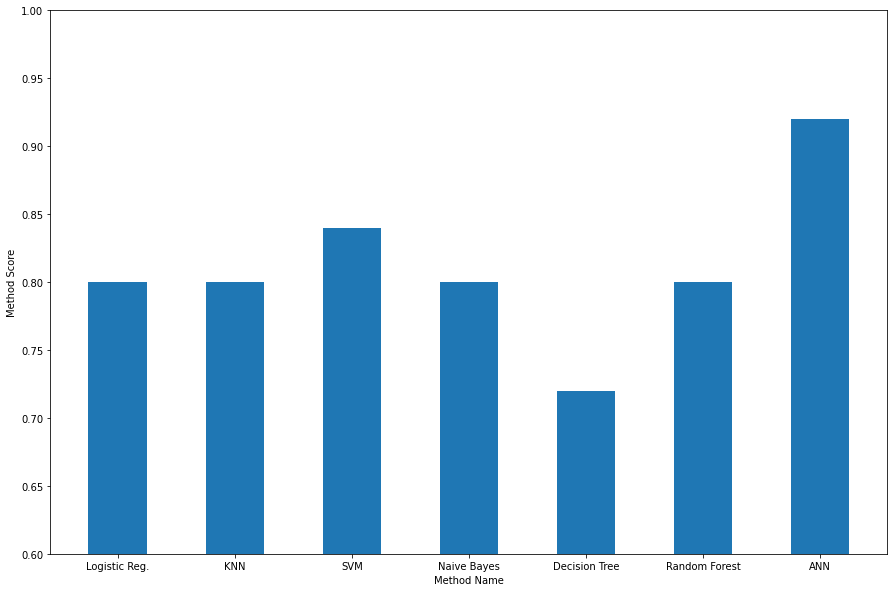

In [ ]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')